# Présentation aux GSDays 2023

Vous trouverez ici les différents code que j'ai utilisé pour produire certaines illustrations et résultats qui ont été présentés lors de la 14ème édition des GSDays le 30/11/2023

## Qubit & Superposition

Ici on créer les histogrames de probabilités et les "Bloch's sphere" représentant un qubit dans différents états:
- L'état 0
- L'état 1
- Un état très classique de superposition |+>
- Un autre état très classique de superposition |->

In [50]:
# Imports mis à part pour plus de lisibilité
# Qiskt SDK v0.45.0
from qiskit import QuantumCircuit, Aer, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram
svsim = Aer.get_backend('aer_simulator')

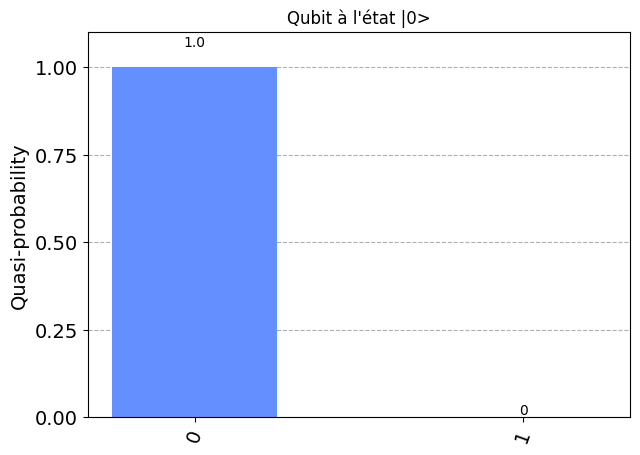

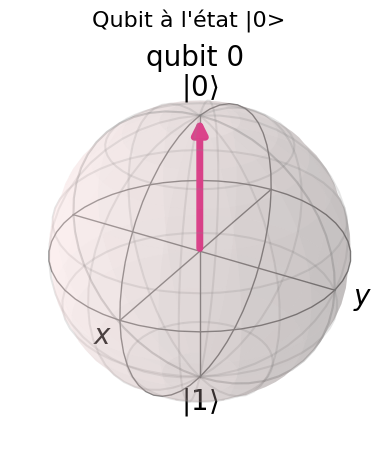

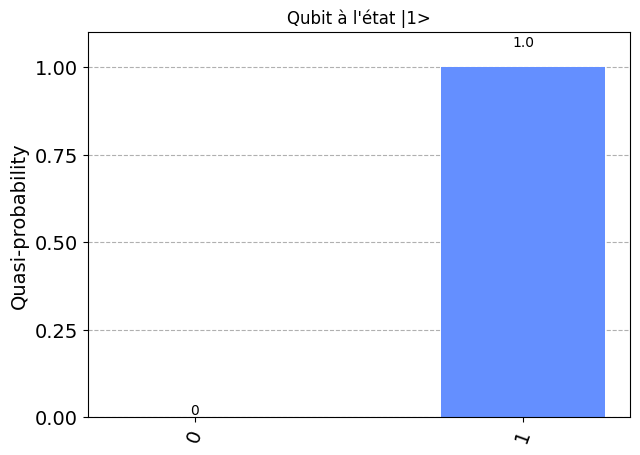

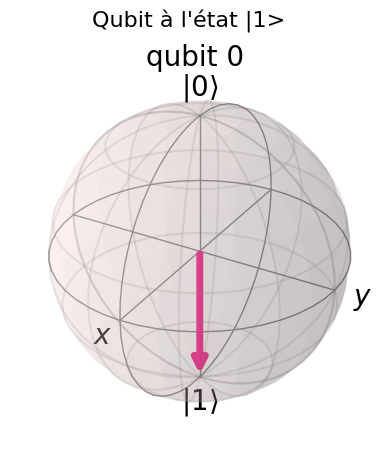

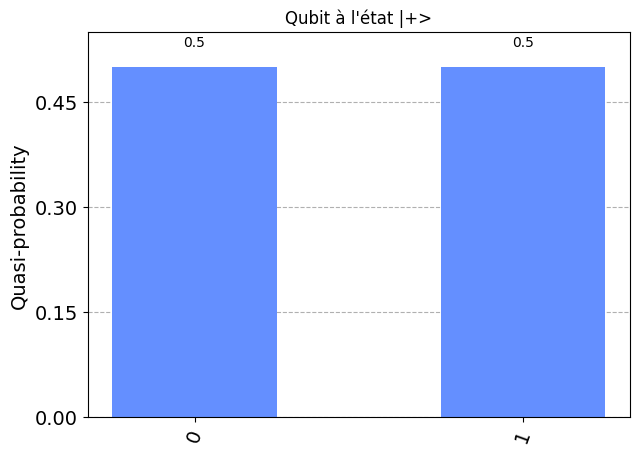

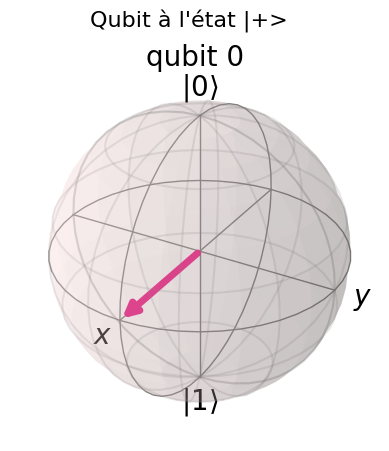

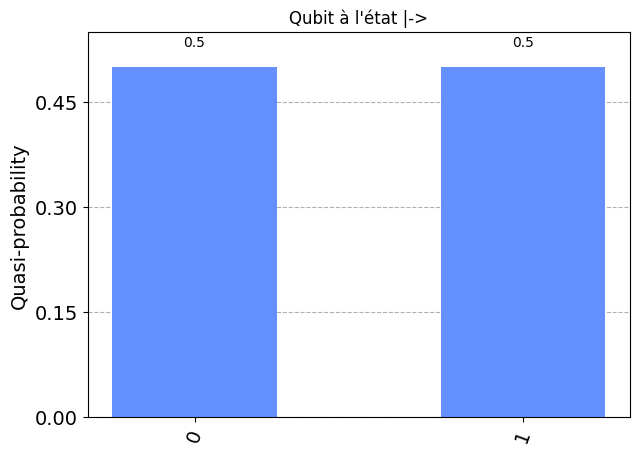

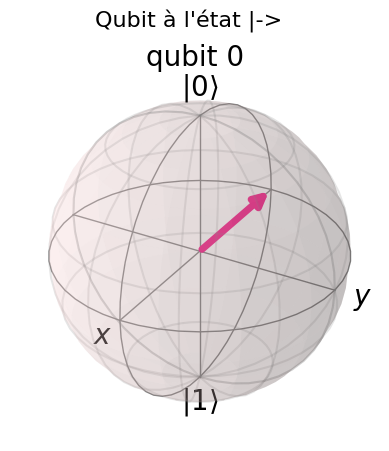

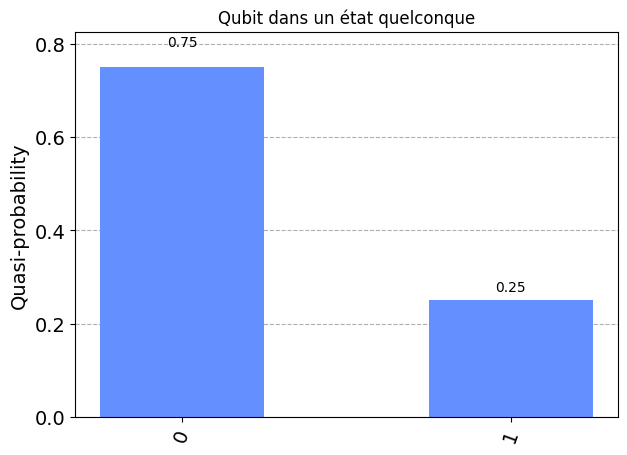

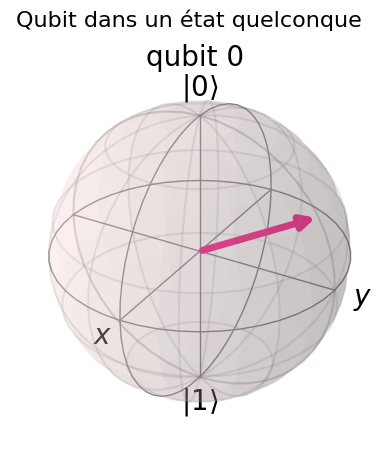

In [275]:
# Un qubit dans l'état |0> (état initial par convention)
qc = QuantumCircuit(1)
qc.save_statevector()
state_0 = svsim.run(qc).result().get_statevector()
# Astuce pour forcer l'affichage des probabilités à 0
probabilities = {str(i):0.0000001 for i in range(2)}
probabilities.update(state_0.probabilities_dict())
display(plot_histogram(probabilities, title="Qubit à l'état |0>"))
display(plot_bloch_multivector(state_0, title="Qubit à l'état |0>", title_font_size=16.0, font_size=20.0))

# Un qubit dans l'état |1>
qc = QuantumCircuit(1)
qc.x(0) # Une porte "NOT", puisque l'état initial est "0", alors le NOT passe le qubit à 1
qc.save_statevector()
state_1 = svsim.run(qc).result().get_statevector()
# Astuce pour forcer l'affichage des probabilités à 0
probabilities = {str(i):0.0000001 for i in range(2)}
probabilities.update(state_1.probabilities_dict())
display(plot_histogram(probabilities, title="Qubit à l'état |1>"))
display(plot_bloch_multivector(state_1, title="Qubit à l'état |1>", title_font_size=16.0, font_size=20.0))

# Un qubit dans l'état |+>
qc = QuantumCircuit(1)
qc.h(0) # Une porte Hadamard, fait passer de |0> => |+>
qc.save_statevector()
state_plus = svsim.run(qc).result().get_statevector()
display(plot_histogram(state_plus.probabilities_dict(), title="Qubit à l'état |+>"))
display(plot_bloch_multivector(state_plus, title="Qubit à l'état |+>", title_font_size=16.0, font_size=20.0))

# Un qubit dans l'état |->
qc = QuantumCircuit(1)
qc.x(0) # Une porte "NOT", puisque l'état initial est "0", alors le NOT passe le qubit à 1
qc.h(0) # Une porte Hadamard, fait passer de |1> => |->
qc.save_statevector()
state_minus = svsim.run(qc).result().get_statevector()
display(plot_histogram(state_minus.probabilities_dict(), title="Qubit à l'état |->"))
display(plot_bloch_multivector(state_minus, title="Qubit à l'état |->", title_font_size=16.0, font_size=20.0))

# Un qubit dans l'état (je simplifie) 0.75|0> + 0.25|1>
qc = QuantumCircuit(1)
qc.ry(math.pi/3, 0)
qc.rz(math.pi/2, 0)
qc.save_statevector()
state_minus = svsim.run(qc).result().get_statevector()
display(plot_histogram(state_minus.probabilities_dict(), title="Qubit dans un état quelconque"))<
display(plot_bloch_multivector(state_minus, title="Qubit dans un état quelconque", title_font_size=16.0, font_size=20.0))


## Circuit

Un circuit quantique est la représentation graphique d'un algorithme quantique. Il met en évidence les intéractions et opération faîtes sur les différents qubits. Il est très ismilaire à un circuit binaire mais par convention, dans un circuit quantique, les qubit reste toujours sur une ligne droite.

Ci-dessous, on a par exemple un additionneur modulaire (on ne prend pas en compte la retenue) avec des qubits.

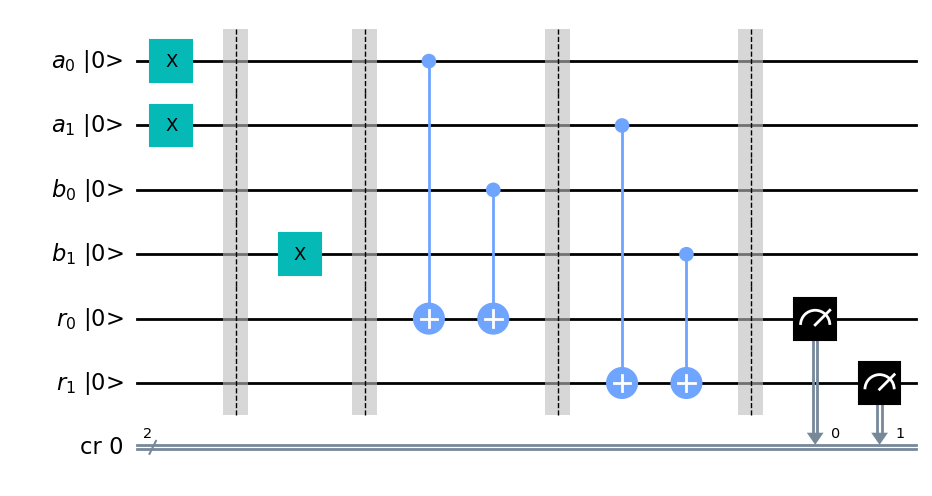

In [89]:
BIT_COUNT=2

# Le nombre a
reg_a = QuantumRegister(BIT_COUNT, 'a')
# Le nombre b
reg_b = QuantumRegister(BIT_COUNT, 'b')
# Le résultat
reg_r = QuantumRegister(BIT_COUNT, 'r')
creg_r = ClassicalRegister(BIT_COUNT, 'cr')

# Le circuit
qc = QuantumCircuit(reg_a, reg_b, reg_r, creg_r)
# Initialisation des registres
for i in range(BIT_COUNT):
    # Pour le registre a, on veut écrire 3
    if 2**i & 3:
        qc.x(reg_a[i])

qc.barrier()

for i in range(BIT_COUNT):
    # Pour le registre b, on veut écrire 2
    if 2**i & 2:
        qc.x(reg_b[i])
qc.barrier()
# Ajout des portes permettant de faire l'addition modulaire
# Les portes utilisées sont des "Controlled-NOT"
for i in range(BIT_COUNT):
    qc.cx(reg_a[i], reg_r[i])
    qc.cx(reg_b[i], reg_r[i])
    qc.barrier()

qc.measure(reg_r, creg_r)

display(qc.draw('mpl', initial_state=True))


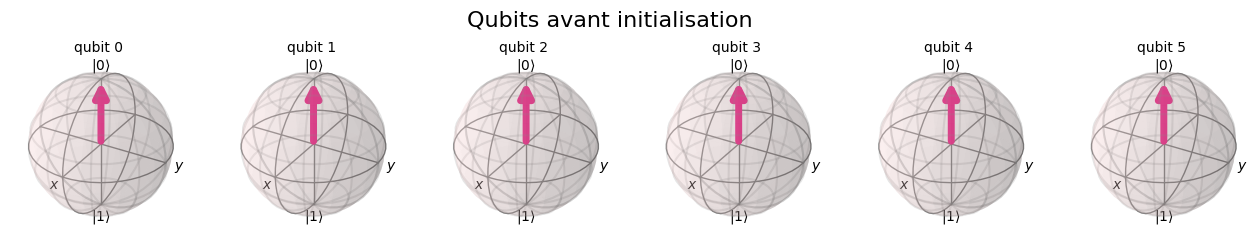

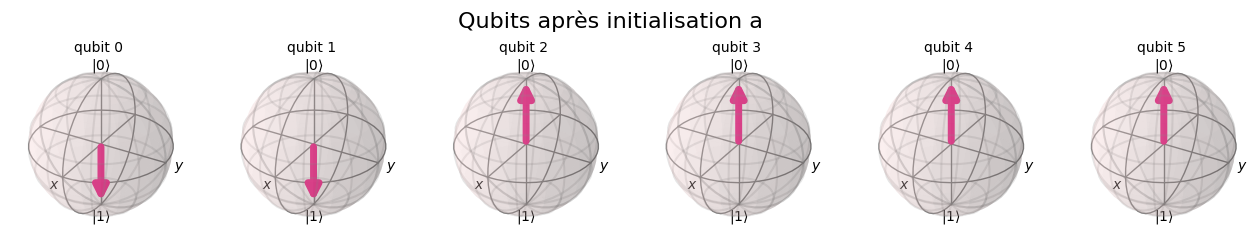

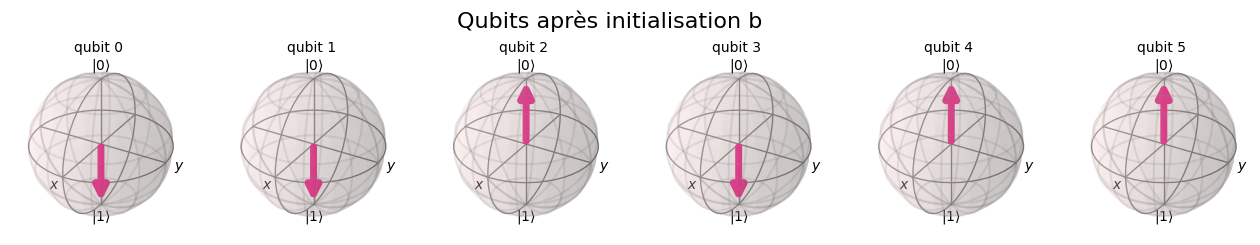

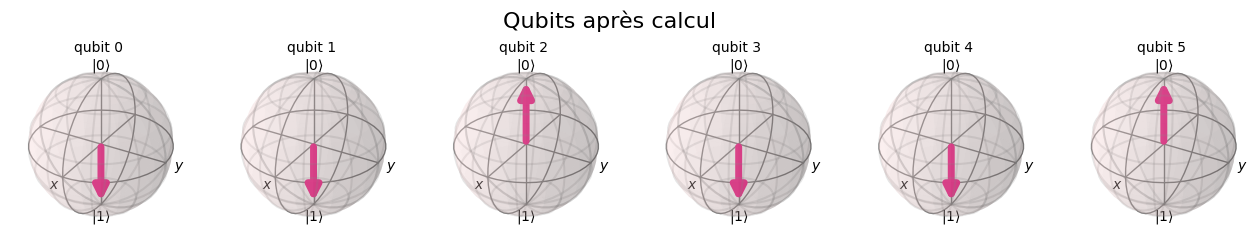

In [276]:
BIT_COUNT=2

# Le nombre a
reg_a = QuantumRegister(BIT_COUNT, 'a')
# Le nombre b
reg_b = QuantumRegister(BIT_COUNT, 'b')
# Le résultat
reg_r = QuantumRegister(BIT_COUNT, 'r')
creg_r = ClassicalRegister(BIT_COUNT, 'cr')

# Le circuit
qc = QuantumCircuit(reg_a, reg_b, reg_r, creg_r)

# Save1
qc.save_statevector(label="save1")
# Initialisation des registres
for i in range(BIT_COUNT):
    # Pour le registre a, on veut écrire 3
    if 2**i & 3:
        qc.x(reg_a[i])

# Save2
qc.save_statevector(label="save2")

for i in range(BIT_COUNT):
    # Pour le registre b, on veut écrire 2
    if 2**i & 2:
        qc.x(reg_b[i])

# Save3
qc.save_statevector(label="save3")

# Ajout des portes permettant de faire l'addition modulaire
# Les portes utilisées sont des "Controlled-NOT"
for i in range(BIT_COUNT):
    qc.cx(reg_a[i], reg_r[i])
    qc.cx(reg_b[i], reg_r[i])

# Save4
qc.save_statevector(label="save4")

qc.measure(reg_r, creg_r)

sim_res = svsim.run(qc, shots=1000).result()

display(plot_bloch_multivector(sim_res.data()["save1"], title="Qubits avant initialisation"))
display(plot_bloch_multivector(sim_res.data()["save2"], title="Qubits après initialisation a"))
display(plot_bloch_multivector(sim_res.data()["save3"], title="Qubits après initialisation b"))
display(plot_bloch_multivector(sim_res.data()["save4"], title="Qubits après calcul"))


## Intrication

Le fait que des qubits distincts n'ont plus d'états indépendants, mais doivent au contraire être considérés comme un unique système.

On met en évidence le phénomène très simplement en regardant d'abord un circuit de 2 qubits qui n'ont aucune intrication, puis un circuit de 2 qubits avec intrication.

C:\Users\jrodon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


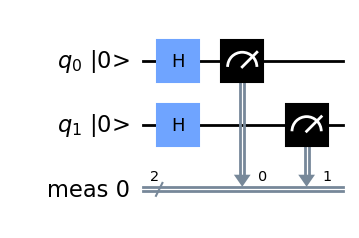

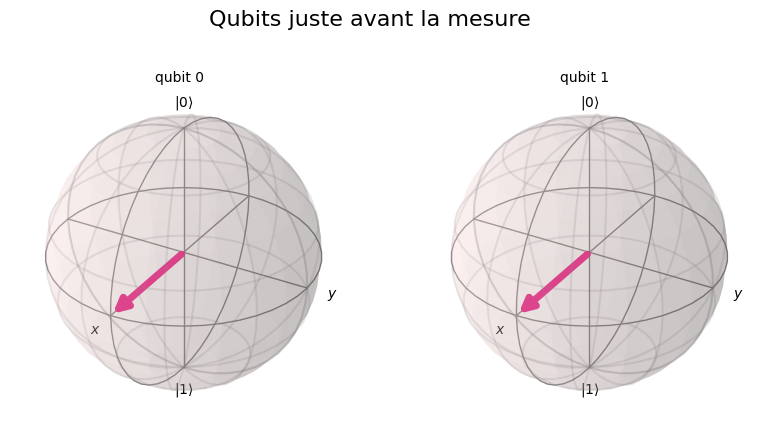

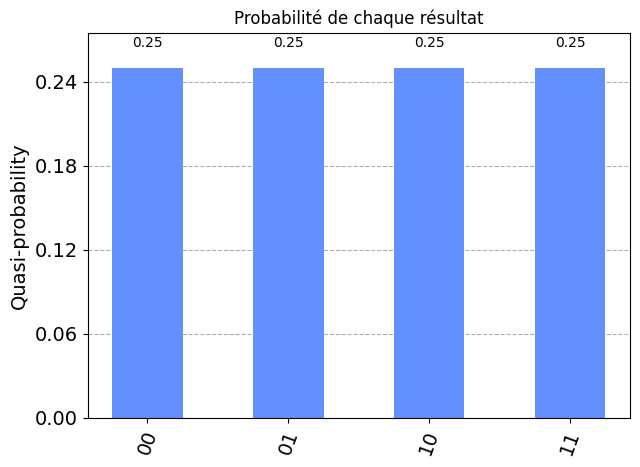

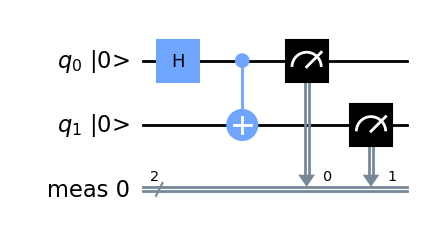

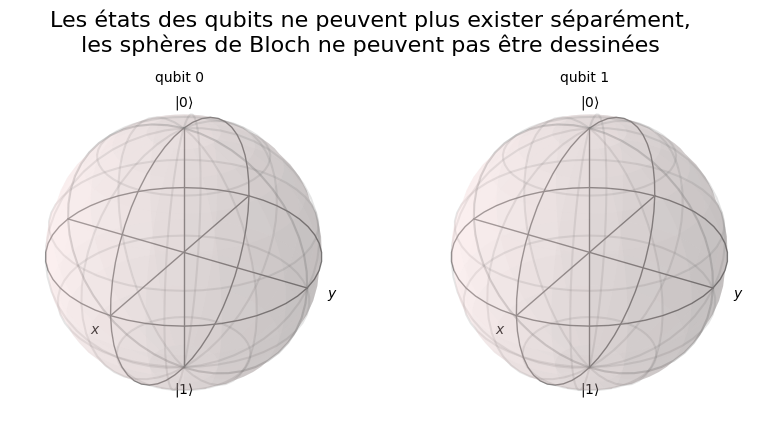

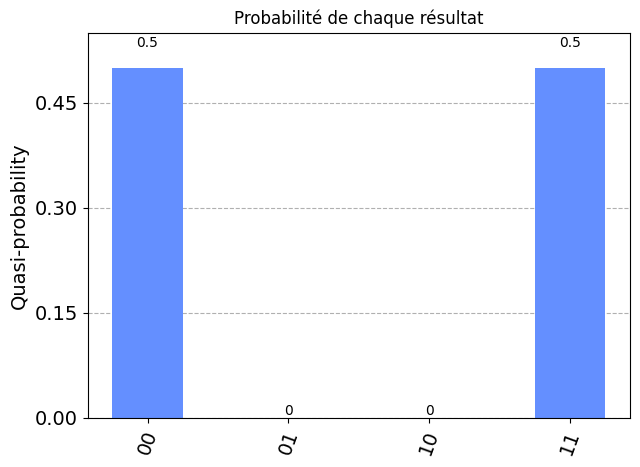

In [277]:

# Un circuit à 2 qubits sans intrication
qc = QuantumCircuit(2)
# Le qubit 0 et le qubit 1 sont mis en superposition
qc.h(0)
qc.h(1)
qc.save_statevector()
qc.measure_all()
# Diagrame du circuit
display(qc.draw('mpl', initial_state=True, plot_barriers=False))

sim_res = svsim.run(qc, shots=1000).result()
# On peut également afficher les sphères de Bloch de chaque qubit
display(plot_bloch_multivector(sim_res.get_statevector(), title="Qubits juste avant la mesure"))
# Et afficher les probabilités
display(plot_histogram(sim_res.get_statevector().probabilities_dict(), title="Probabilité de chaque résultat"))

# Un circuit à 2 qubits avec intrication
qc = QuantumCircuit(2)
# Le qubit 0 est mis en superposition
qc.h(0)
# Puis utilisé comme qubit de controle pour le qubit 1
qc.cx(0,1)
qc.save_statevector()
qc.measure_all()
# Diagrame du circuit
display(qc.draw('mpl', initial_state=True, plot_barriers=False))

sim_res = svsim.run(qc, shots=1000).result()
# On NE PEUT PAS afficher les sphères de Bloch de chaque qubit parce que ça n'a plus aucun sens!!!
display(plot_bloch_multivector(sim_res.get_statevector(), title="Les états des qubits ne peuvent plus exister séparément,\nles sphères de Bloch ne peuvent pas être dessinées"))
# Astuce pour forcer l'affichage des probabilités à 0
probabilities = {format(i, f'02b'):0.0000001 for i in range(4)}
probabilities.update(sim_res.get_statevector().probabilities_dict())
# Les probabilités sont maintenant uniquement concevable pour les deux qubits ensembles,
# il n'existe aucun moyen d'expliquer ce résultat en invoquant des probabilités indépendantes pour chaque qubit
display(plot_histogram(probabilities, title="Probabilité de chaque résultat"))



# L'informatique quantique en pratique

Prenons l'example de l'addition modulaire, et faisons quelques expériences pour voir comment elle se comporte sur différents QPU.

Pour celà, je choisi d'utiliser Amazon Braket pour avoir accès à des ordinateurs quantiques. Il faut donc que je transpile le circuit du formalisme "Qiskit" vers celui de Braket SDK.

Une fois cela fait je peux exécuter mon circuit sur divers devices de mon choix

## Expérience réelle sur l'additioneur modulo 4

In [120]:
# Fonction utilitaire pour produire des labels plus lisibles pour plot_histogram
def format_label(k):
    def label(k):
        rev_k = ''.join(reversed(k))
        return f"{int(rev_k, 2)}({rev_k})"
    k_a = k[:len(reg_a)]
    k_b = k[len(reg_a):len(reg_a)+len(reg_b)]
    k_r = k[len(reg_a)+len(reg_b):]
    return f"{label(k_a)} + {label(k_b)}\n= {label(k_r)}"

T  : |0| 1 | 2 |
                
q0 : -X-C-------
        |       
q1 : -X-|-C-----
        | |     
q2 : ---|-|-C---
        | | |   
q3 : -X-|-|-|-C-
        | | | | 
q4 : ---X-|-X-|-
          |   | 
q5 : -----X---X-

T  : |0| 1 | 2 |


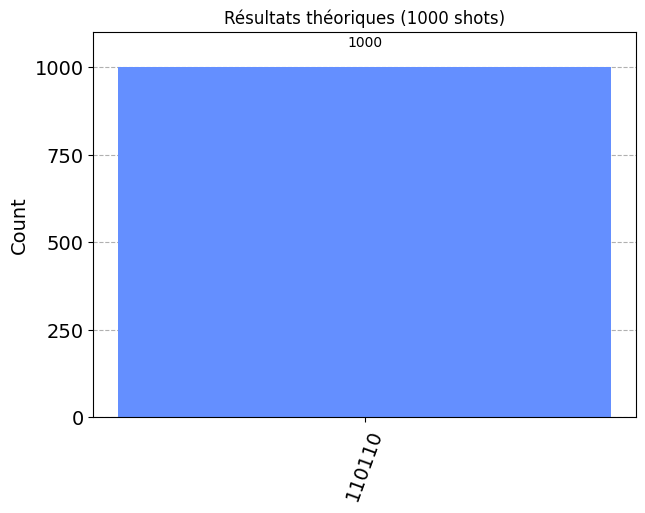

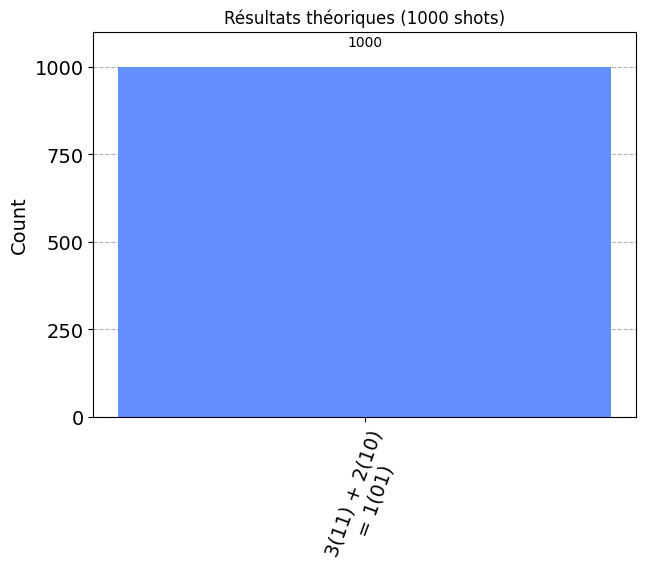

In [128]:
##################################################################
# Braket SDK v1.61.0
# Circuits !
from braket.circuits import Circuit, circuit
# Qubits !
from braket.circuits.qubit_set import QubitSetInput, QubitSet
from braket.circuits.qubit import Qubit
# Devices !
from braket.devices import Device, LocalSimulator   # Local simulator
local_simulator = LocalSimulator()
from braket.aws import AwsDevice    # AWS simulators/QPU
##################################################################

# On créé le circuit d'addition modulaire avec Braket
BIT_COUNT=2
qc = Circuit()
reg_a = [*range(BIT_COUNT)]
reg_b = [*range(len(reg_a), len(reg_a) + BIT_COUNT)]
reg_r = [*range(len(reg_a) + len(reg_b), len(reg_a) + len(reg_b) + BIT_COUNT)]

for i in range(BIT_COUNT):
    # Pour le registre a, on veut écrire 3
    if 2**i & 3:
        qc.x(reg_a[i])
    # Pour le registre b, on veut écrire 2
    if 2**i & 2:
        qc.x(reg_b[i])

# Ajout des portes permettant de faire l'addition modulaire
# Les portes utilisées sont des "Controlled-NOT"
for i in range(BIT_COUNT):
    qc.cnot(reg_a[i], reg_r[i])
    qc.cnot(reg_b[i], reg_r[i])

# Braket ne sait pas faire de jolies images, mais il fait de l'ASCII art...
# Suffisant pour se convaincre que c'est bien le même circuit
print(qc)

# On simule le circuit avec le LocalBackend de Braket
measurement_counts = local_simulator.run(qc, shots=1000).result().measurement_counts
display(plot_histogram(measurement_counts, title="Résultats théoriques (1000 shots)"))
# On transforme les labels pour un affichage plus clair
measurement_counts_formated = {format_label(k):v for k, v in measurement_counts.items()}
# On vizualize les résultats avec Qiskit
display(plot_histogram(measurement_counts_formated, title="Résultats théoriques (1000 shots)"))


In [199]:
# Comme j'utilise AWS SSO, c'est plus simple pour moi d'exporter les éléments de session ici
# Si vous avez des profils définis avec l'AWS CLI, ou AWS SSO configuré avec AWS CLI, ou d'autres méthodes pour fournir
# les credentials AWS, vous être libres de les utiliser
import os
os.environ["AWS_ACCESS_KEY_ID"]=""
os.environ["AWS_SECRET_ACCESS_KEY"]=""
os.environ["AWS_SESSION_TOKEN"]=""


In [113]:
# On execute le circuit sur un des IONQ d'AWS, Harmony
os.environ["AWS_REGION"]="us-east-1"
harmony = AwsDevice("arn:aws:braket:us-east-1::device/qpu/ionq/Harmony")
harmony_task_id = harmony.run(qc, shots=1000).id
print(harmony_task_id)

arn:aws:braket:us-east-1:434202813724:quantum-task/9a668dff-5a73-4e1e-b341-7f46320df166


In [114]:
from braket.aws import AwsQuantumTask
print('Status of task:', AwsQuantumTask(arn=harmony_task_id).state())

Status of task: COMPLETED


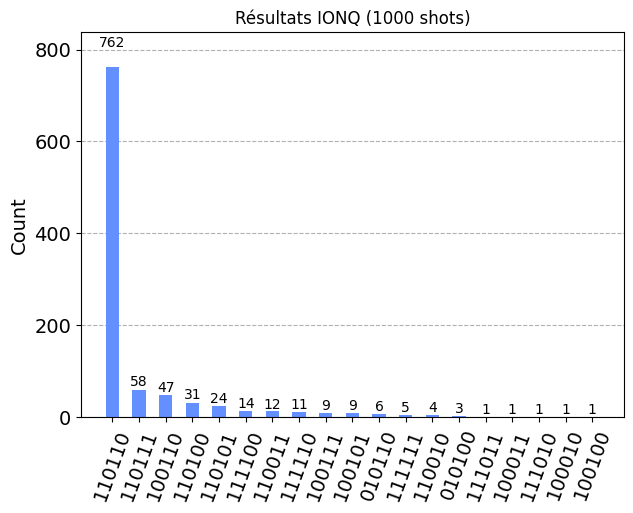

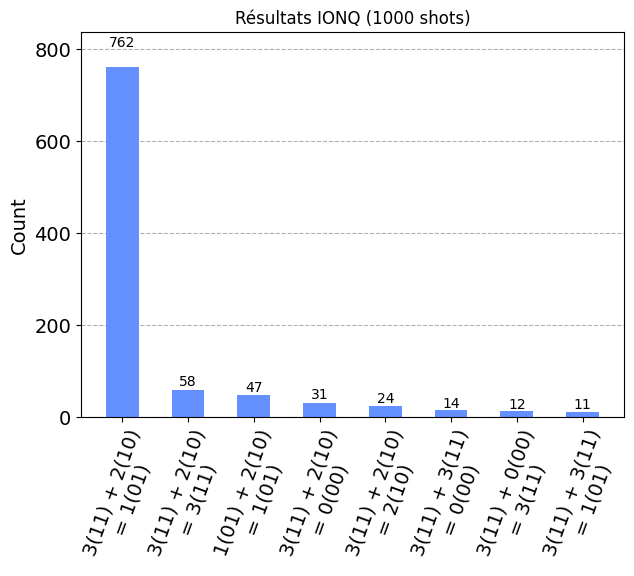

In [130]:
# On va chercher les résultats de la task
measurement_counts = AwsQuantumTask(arn=harmony_task_id).result().measurement_counts
# On vizualize les résultats avec Qiskit
display(plot_histogram(measurement_counts, title="Résultats IONQ (1000 shots)", sort='value_desc'))
# Comme c'est le bordel, on ne prend que les counts>10
# Et on transforme les labels pour un affichage plus clair
measurement_counts_filtered = {format_label(k):v for k, v in measurement_counts.items() if v>10}
display(plot_histogram(measurement_counts_filtered, title="Résultats IONQ (1000 shots)", sort='value_desc'))


## Illustrations de Bloch sphere pas tout à fait correctement allignée

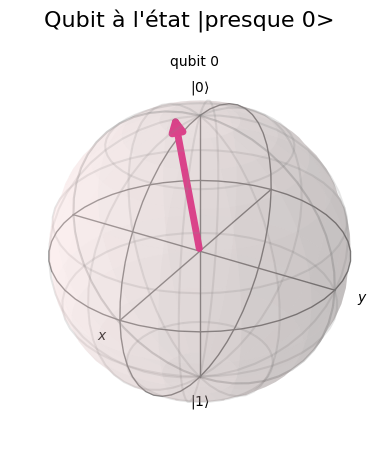

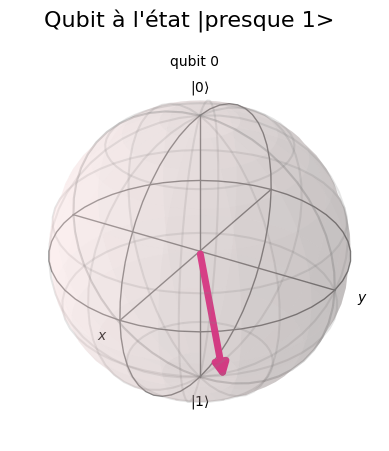

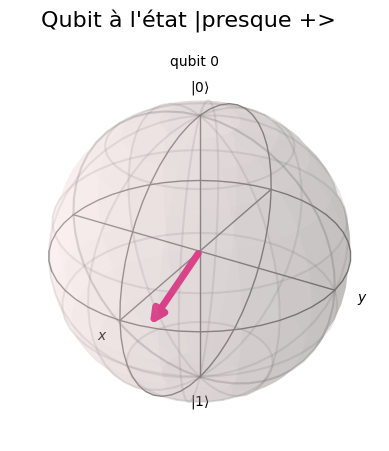

In [145]:
import math

# Un qubit dans l'état "pas-tout-à-fait" |0>
qc = QuantumCircuit(1)
qc.rx(math.pi/16, 0)
qc.save_statevector()
state_0 = svsim.run(qc).result().get_statevector()
display(plot_bloch_multivector(state_0, title="Qubit à l'état |presque 0>"))

# Un qubit dans l'état "pas-tout-à-fait" |+>
qc = QuantumCircuit(1)
qc.rx(math.pi/16, 0)
qc.x(0)
qc.save_statevector()
state_0 = svsim.run(qc).result().get_statevector()
display(plot_bloch_multivector(state_0, title="Qubit à l'état |presque 1>"))

# Un qubit dans l'état "pas-tout-à-fait" |+>
qc = QuantumCircuit(1)
qc.rx(math.pi/16, 0)
qc.h(0)
qc.save_statevector()
state_0 = svsim.run(qc).result().get_statevector()
display(plot_bloch_multivector(state_0, title="Qubit à l'état |presque +>"))

## Illustration de la profondeur de circuit avec l'addition modulaire

'Circuit depth: 3'

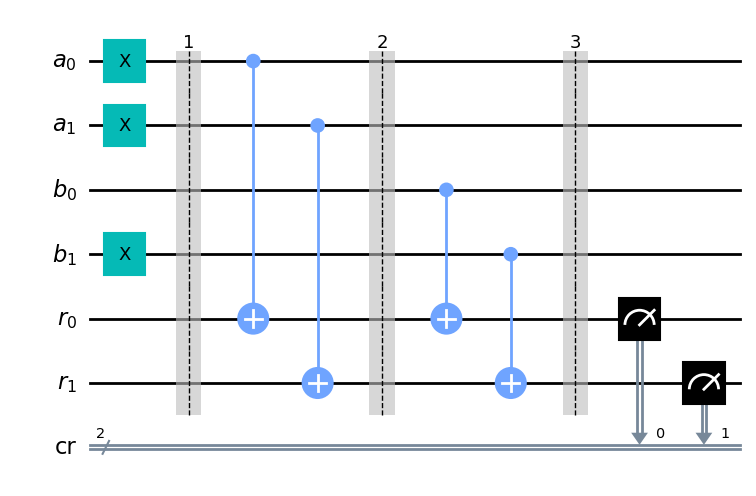

In [44]:
BIT_COUNT=2

# Le nombre a
reg_a = QuantumRegister(BIT_COUNT, 'a')
# Le nombre b
reg_b = QuantumRegister(BIT_COUNT, 'b')
# Le résultat
reg_r = QuantumRegister(BIT_COUNT, 'r')
creg_r = ClassicalRegister(BIT_COUNT, 'cr')

# Le circuit
qc = QuantumCircuit(reg_a, reg_b, reg_r, creg_r)

# Initialisation des registres
for i in range(BIT_COUNT):
    # Pour le registre a, on veut écrire 3
    if 2**i & 3:
        qc.x(reg_a[i])

for i in range(BIT_COUNT):
    # Pour le registre b, on veut écrire 2
    if 2**i & 2:
        qc.x(reg_b[i])

qc.barrier(label='1')

# Ajout des portes permettant de faire l'addition modulaire
# Les portes utilisées sont des "Controlled-NOT"
for i in range(BIT_COUNT):
    qc.cx(reg_a[i], reg_r[i])

qc.barrier(label='2')

for i in range(BIT_COUNT):
    qc.cx(reg_b[i], reg_r[i])

qc.barrier(label='3')

display(f"Circuit depth: {qc.depth()}")

qc.measure(reg_r, creg_r)

display(qc.draw('mpl'))


## Expérience réelle sur une variante de l'additionneur de Dapper

Cet additionneur prend en compte les retenues. L'addition se fait dans l'espace de Fourrier.

C:\Users\jrodon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


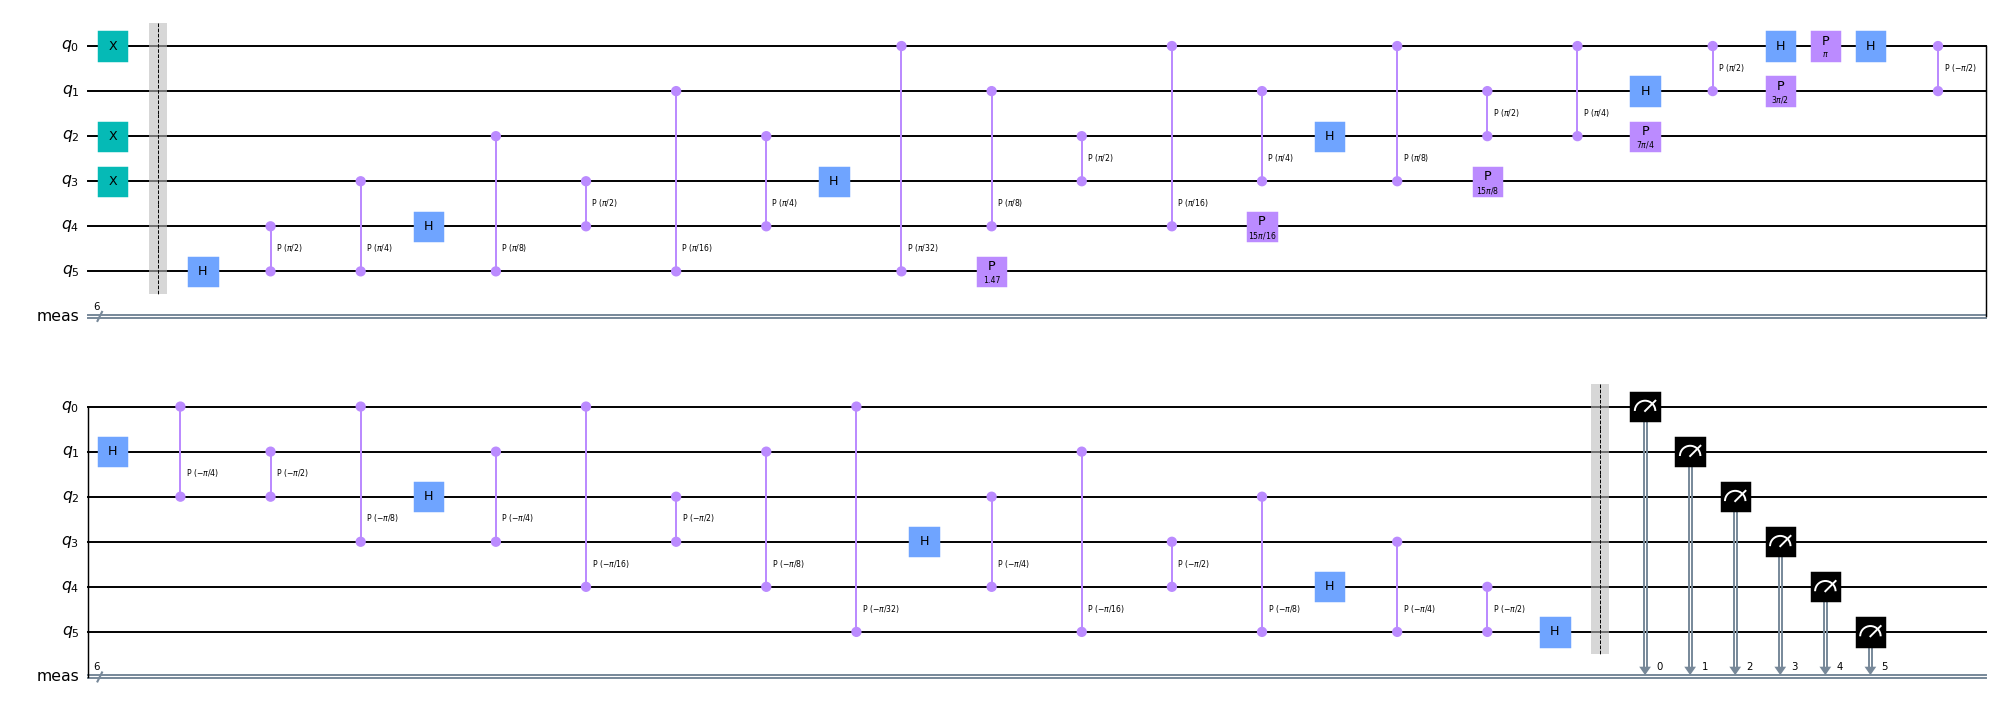

'Profondeur du circuit Braket: 69'

In [253]:
# Création du circuit pour un additionneur qui ajoute de manière fixe le nombre 15 dans un registre de 6 qubits contenant 13
# 15 et 13 sont parfaitement arbitraires, mais je souhaite conserver un circuit sur 6 qubits
# Pour rester dans la même échelle que le précédent additionneur

# Cette fonction implémente la Quantum Fourier Transform, voir un des notebook sur Shor pour en avoir une version plus complète et commentée
# Ici je privilégie la conscision au détriment des explications
def partial_qft(circuit, qubit_count, reverse = False):
    if not reverse:
        for qubit_num in reversed(range(qubit_count)):
            circuit.h(qubit_num)
            for j in reversed(range(qubit_num)):
                angle = 2*math.pi/(2**(1+qubit_num-j))
                # Qiskit
                if type(circuit) == QuantumCircuit:
                    circuit.cp(angle, j, qubit_num)
                # Braket
                else:
                    # circuit.cphaseshift(j, qubit_num, angle)
                    # Les QPU IONQ ne supportent pas phaseshift/cphaseshift
                    # donc on fait l'équivalent avec des portes supportées
                    circuit.rz(qubit_num, angle/2)
                    circuit.cnot(j, qubit_num)
                    circuit.rz(qubit_num, -angle/2)
                    circuit.cnot(j, qubit_num)
    else:
        for qubit_num in range(qubit_count):
            for j in range(qubit_num):
                angle = - 2*math.pi/(2**(1+qubit_num-j))
                # Qiskit
                if type(circuit) == QuantumCircuit:
                    circuit.cp(angle, j, qubit_num)
                # Braket
                else:
                    # circuit.cphaseshift(j, qubit_num, angle)
                    # Les QPU IONQ ne supportent pas phaseshift/cphaseshift
                    # donc on fait l'équivalent avec des portes supportées
                    circuit.cnot(j, qubit_num)
                    circuit.rz(qubit_num, -angle/2)
                    circuit.cnot(j, qubit_num)
                    circuit.rz(qubit_num, angle/2)
            circuit.h(qubit_num)

# Idem, voir le notebook shors-2-4n+3.ipynb pour une version commentée
# Voir https://arxiv.org/pdf/quant-ph/0008033.pdf pour l'article scientifique source
# Voir https://arxiv.org/pdf/quant-ph/0205095.pdf (p4, Chap 2.1) pour un chapitre sur la modification de l'idée de Dapper 
# permettant d'obtenir un additionneur fixe
def add_fixed_number(a, circuit, qubit_count):
    for qubit_num in range(qubit_count):
        angle = 0
        for a_i in range(qubit_num+1):
            if 2**a_i & a:
                k = 1 + qubit_num - a_i
                angle += 2*math.pi/(2**k)
        # Qiskit
        if type(circuit) == QuantumCircuit:
            circuit.p(angle, qubit_num)
        # Braket
        else:
            # circuit.phaseshift(qubit_num, angle)
            # Les QPU IONQ ne supportent pas phaseshift/cphaseshift
            # donc on fait l'équivalent avec des portes supportées
            circuit.rz(qubit_num, angle)

def create_fixed_dapper_adder_circuit(circuit, qubit_count, initial_value, fixed_value_to_add):
    # Inscription initiale du nombre
    for i in range(qubit_count):
        if 2**i & initial_value:
            circuit.x(i)
    # Qiskit
    if type(circuit) == QuantumCircuit:
        circuit.barrier()
    # QFT
    partial_qft(circuit, qubit_count)
    # Adder
    add_fixed_number(fixed_value_to_add, circuit, qubit_count)
    # Reverse-QFT
    partial_qft(circuit, qubit_count, reverse=True)

QUBIT_COUNT=6 
# Création du circuit d'addition avec Qiskit pour la vizualisation
qiskit_fixed_dapper_adder_circuit = QuantumCircuit(QUBIT_COUNT)
create_fixed_dapper_adder_circuit(qiskit_fixed_dapper_adder_circuit, QUBIT_COUNT, 13, 15)
qiskit_fixed_dapper_adder_circuit.measure_all()
display(qiskit_fixed_dapper_adder_circuit.draw('mpl', fold=42, scale=0.7))


# Création du circuit d'addition Braket
braket_fixed_dapper_adder_circuit = Circuit()
create_fixed_dapper_adder_circuit(braket_fixed_dapper_adder_circuit, QUBIT_COUNT, 13, 15)
display(f"Profondeur du circuit Braket: {braket_fixed_dapper_adder_circuit.depth}")

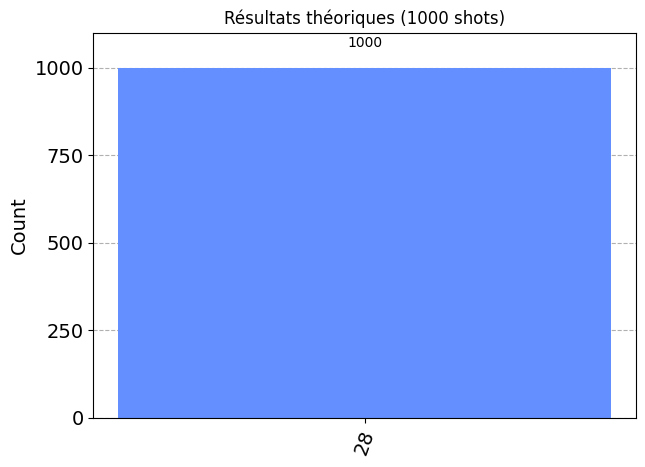

In [233]:
# On simule le circuit avec le LocalBackend de Braket
measurement_counts = local_simulator.run(braket_fixed_dapper_adder_circuit, shots=1000).result().measurement_counts
# On transforme les labels pour un affichage plus clair
measurement_counts_formated = {int(''.join(reversed(k)), 2):v for k, v in measurement_counts.items()}
# On vizualize les résultats avec Qiskit
display(plot_histogram(measurement_counts_formated, title="Résultats théoriques (1000 shots)"))

In [ ]:
# On execute le circuit sur l'Oxford Quantum Circuits d'AWS, Lucy
os.environ["AWS_REGION"]="eu-west-2"
lucy = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")
lucy_task_id = lucy.run(braket_fixed_dapper_adder_circuit, shots=1000).id

In [206]:
print('Status of task:', AwsQuantumTask(arn=lucy_task_id).state())

Status of task: COMPLETED


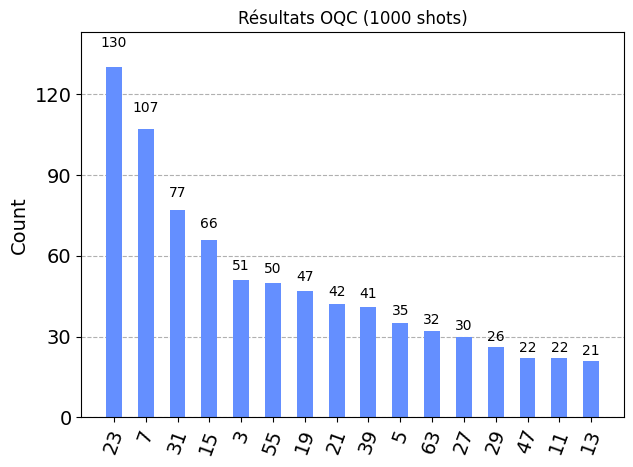

In [214]:
# On va chercher les résultats de la task
measurement_counts = AwsQuantumTask(arn=lucy_task_id).result().measurement_counts
# On transforme les labels pour un affichage plus clair
measurement_counts_formated = {int(''.join(reversed(k)), 2):v for k, v in measurement_counts.items() if v > 20}
# On vizualize les résultats avec Qiskit
display(plot_histogram(measurement_counts_formated, title="Résultats OQC (1000 shots)", sort='value_desc'))

In [ ]:
# On execute le circuit sur un des IONQ d'AWS, Harmony
os.environ["AWS_REGION"]="us-east-1"
harmony = AwsDevice("arn:aws:braket:us-east-1::device/qpu/ionq/Harmony")
harmony_task_id = harmony.run(braket_fixed_dapper_adder_circuit, shots=1000).id

In [254]:
print('Status of task:', AwsQuantumTask(arn=harmony_task_id).state())

Status of task: COMPLETED


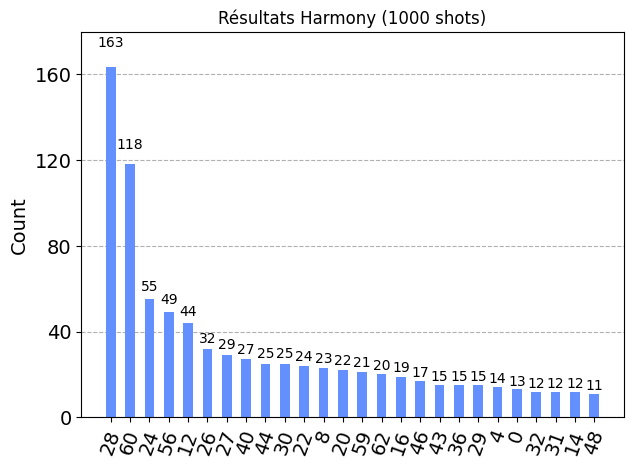

In [257]:
# On va chercher les résultats de la task
measurement_counts = AwsQuantumTask(arn=harmony_task_id).result().measurement_counts
# On transforme les labels pour un affichage plus clair
measurement_counts_formated = {int(''.join(reversed(k)), 2):v for k, v in measurement_counts.items() if v > 10}
# On vizualize les résultats avec Qiskit
display(plot_histogram(measurement_counts_formated, title="Résultats Harmony (1000 shots)", sort='value_desc'))

In [ ]:
# On execute le circuit sur un des IONQ d'AWS, Aria-1
os.environ["AWS_REGION"]="us-east-1"
aria1 = AwsDevice("arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1")
aria1_task_id = aria1.run(braket_fixed_dapper_adder_circuit, shots=1000).id

In [247]:
print('Status of task:', AwsQuantumTask(arn=aria1_task_id).state())

Status of task: COMPLETED


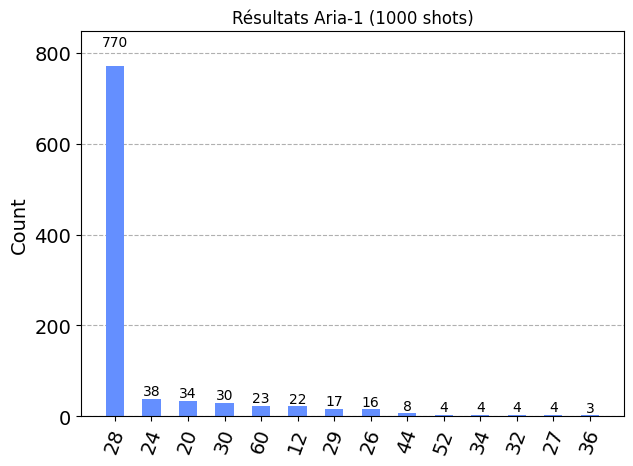

In [252]:
# On va chercher les résultats de la task
measurement_counts = AwsQuantumTask(arn=aria1_task_id).result().measurement_counts
# On transforme les labels pour un affichage plus clair
measurement_counts_formated = {int(''.join(reversed(k)), 2):v for k, v in measurement_counts.items() if v > 2}
# On vizualize les résultats avec Qiskit
display(plot_histogram(measurement_counts_formated, title="Résultats Aria-1 (1000 shots)", sort='value_desc'))

## Note de l'auteur

Pour être parfaitement franc, j'ai été estomacqué par le résultat de Aria-1. Le circuit fait ~70 de profondeur, j'ignore la longueur une fois compilé mais c'est sans doute plus long que ça. Et à la fin, ce bébé crache un résultat correct 77% du temps !!!

De fait, j'ai consacré un peu d'argent à chercher les limites de ce QPU, qui est probablement, de loin, le plus performant au monde (les qubits supra-conducteurs des concurrents, notamment IBM, ne tiennent pas la route sur des circuits aussi longs et complexes à ma connaissance, notamment parce qu'ils ont une topologie très limitante).

Si ça vous intéresse, c'est le notebook `test-aria1.ipynb`.

# Les opération nativement supportées

Représentation de ce qui peut se passer pour la transpilation d'un algorithme en une version nativement exécutable par un QPU.

On montre ici quelques équivalences classiques

C:\Users\jrodon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


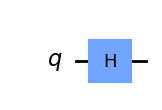

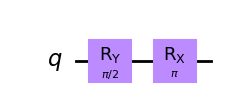

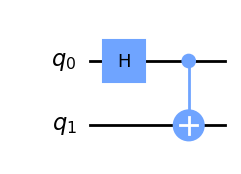

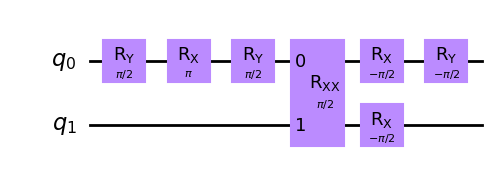

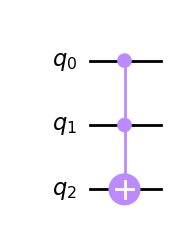

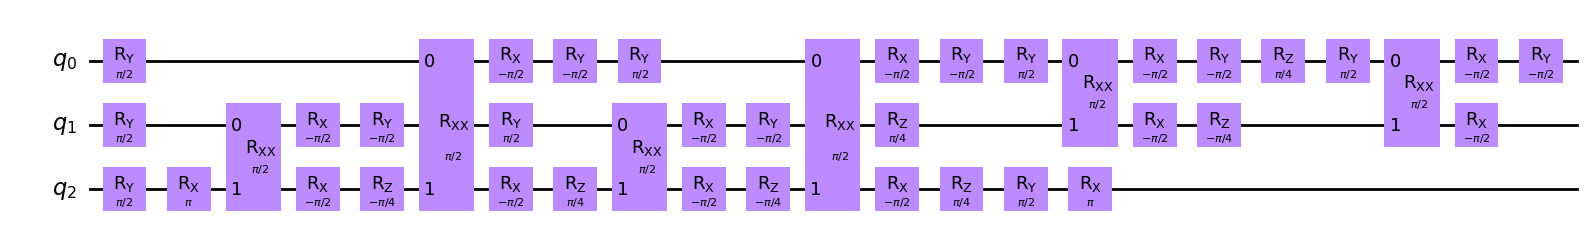

In [336]:
# Hadamard "logic"
logic_circuit = QuantumCircuit(1)
logic_circuit.h(0)
display(logic_circuit.draw('mpl'))
# logic_circuit.save_statevector()
# display(plot_bloch_multivector(svsim.run(logic_circuit).result().get_statevector()))

# Hadamard "native", avec uniquement des rotations
native_circuit = QuantumCircuit(1)
native_circuit.ry(math.pi/2, 0)
native_circuit.rx(math.pi, 0)
display(native_circuit.draw('mpl'))
# native_circuit.save_statevector()
# display(plot_bloch_multivector(svsim.run(native_circuit).result().get_statevector()))

# |+> avec les portes logic
logic_circuit = QuantumCircuit(2)
logic_circuit.h(0)
logic_circuit.cx(0, 1)
display(logic_circuit.draw('mpl'))
# logic_circuit.save_statevector()
# display(plot_histogram(svsim.run(logic_circuit).result().get_statevector().probabilities_dict()))

# |+> avec seulement des rotations
native_circuit = QuantumCircuit(2)
native_circuit.ry(math.pi/2, 0)
native_circuit.rx(math.pi, 0)
native_circuit.ry(math.pi/2, 0)
native_circuit.rxx(math.pi/2, 0, 1)
native_circuit.rx(-math.pi/2, 1)
native_circuit.rx(-math.pi/2, 0)
native_circuit.ry(-math.pi/2, 0)
display(native_circuit.draw('mpl'))
# native_circuit.save_statevector()
# display(plot_histogram(svsim.run(native_circuit).result().get_statevector().probabilities_dict()))

# Toffoli comme porte unique
logic_circuit = QuantumCircuit(3)
logic_circuit.ccx(0, 1, 2)
display(logic_circuit.draw('mpl'))
# logic_circuit.save_statevector()
# display(plot_histogram(svsim.run(logic_circuit).result().get_statevector().probabilities_dict()))

# Toffoli en rotations
# https://en.wikipedia.org/wiki/Toffoli_gate
native_circuit = QuantumCircuit(3)
# h(2)
native_circuit.ry(math.pi/2, 2)
native_circuit.rx(math.pi, 2)

# cx(1,2)
native_circuit.ry(math.pi/2, 1)
native_circuit.rxx(math.pi/2, 1, 2)
native_circuit.rx(-math.pi/2, 2)
native_circuit.rx(-math.pi/2, 1)
native_circuit.ry(-math.pi/2, 1)

# T-dagger(2)
native_circuit.rz(-math.pi/4, 2)

# cx(0,2)
native_circuit.ry(math.pi/2, 0)
native_circuit.rxx(math.pi/2, 0, 2)
native_circuit.rx(-math.pi/2, 2)
native_circuit.rx(-math.pi/2, 0)
native_circuit.ry(-math.pi/2, 0)

# T(2)
native_circuit.rz(math.pi/4, 2)

# cx(1,2)
native_circuit.ry(math.pi/2, 1)
native_circuit.rxx(math.pi/2, 1, 2)
native_circuit.rx(-math.pi/2, 2)
native_circuit.rx(-math.pi/2, 1)
native_circuit.ry(-math.pi/2, 1)

# T-dagger(2)
native_circuit.rz(-math.pi/4, 2)

# cx(0,2)
native_circuit.ry(math.pi/2, 0)
native_circuit.rxx(math.pi/2, 0, 2)
native_circuit.rx(-math.pi/2, 2)
native_circuit.rx(-math.pi/2, 0)
native_circuit.ry(-math.pi/2, 0)

# T(1)
native_circuit.rz(math.pi/4, 1)

# T(2)
native_circuit.rz(math.pi/4, 2)

# cx(0,2)
native_circuit.ry(math.pi/2, 0)
native_circuit.rxx(math.pi/2, 0, 1)
native_circuit.rx(-math.pi/2, 1)
native_circuit.rx(-math.pi/2, 0)
native_circuit.ry(-math.pi/2, 0)

# h(2)
native_circuit.ry(math.pi/2, 2)
native_circuit.rx(math.pi, 2)

# T(0)
native_circuit.rz(math.pi/4, 0)

# T-dagger(1)
native_circuit.rz(-math.pi/4, 1)

# cx(0,1)
native_circuit.ry(math.pi/2, 0)
native_circuit.rxx(math.pi/2, 0, 1)
native_circuit.rx(-math.pi/2, 1)
native_circuit.rx(-math.pi/2, 0)
native_circuit.ry(-math.pi/2, 0)

display(native_circuit.draw('mpl'))
# native_circuit.save_statevector()
# display(plot_histogram(svsim.run(native_circuit).result().get_statevector().probabilities_dict()))




# L'algorithme de Shor

Voir `shors-2-4n+3.ipynb` pour une implémentation optimisée et testable sur simulateur. Pour une découverte plus en douceur, commencer par `shors-1-7n+2.ipynb`.